In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
from tqdm import tqdm
import lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [90]:
df1 = pd.read_csv('delaney_solubility.csv') #read in the dataset

In [91]:
df1

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.18,-2.79,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.00,-2.23,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.74,-2.55,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.48,-1.96,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.04,-3.08,FC(F)(Cl)C(F)(Cl)Cl
...,...,...,...,...
1139,vamidothion,1.14,-1.45,CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140,Vinclozolin,-4.92,-4.38,CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141,Warfarin,-3.89,-3.91,CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O
1142,Xipamide,-3.79,-3.64,Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O


In [92]:
#change each of the smiles to a mol object so that I can get the descriptors in the next step.
moldata = []
for i in df1['SMILES']:
    mols = Chem.MolFromSmiles(i)
    moldata.append(mols)

In [118]:
#calculating the descriptors
molwt= []
mollogp =[]
numHdonor = []
numHAcceptor = []
numaromRings = []
tpsa = []
for i in moldata:
    desc_MolWt = Descriptors.MolWt(i)
    molwt.append(desc_MolWt)
    desc_MolLogP = Descriptors.MolLogP(i)
    mollogp.append(desc_MolLogP)
    desc_NumHDonors = Lipinski.NumHDonors(i)
    numHdonor.append(desc_NumHDonors)
    desc_NumHAcceptors = Lipinski.NumHAcceptors(i)
    numHAcceptor.append(desc_NumHAcceptors)
    desc_NumAromaticRings = Lipinski.NumAromaticRings(i)
    numaromRings.append(desc_NumAromaticRings)
    desc_TPSA = Descriptors.TPSA(i)
    tpsa.append(desc_TPSA)

In [119]:
#adding in the columns to the original dataframe
col = {'MolWt': molwt, 'MolLogP':mollogp, 'NumHDonors': numHdonor, 'NumHAcceptors': numHAcceptor, 'NumAromaticRings': numaromRings, 'TPSA': tpsa}
extracol = pd.DataFrame(col)

In [120]:
df_combined = pd.concat([df1, extracol], axis = 1)

In [121]:
df_combined

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES,MolWt,MolLogP,NumHDonors,NumHAcceptors,NumAromaticRings,TPSA
0,"1,1,1,2-Tetrachloroethane",-2.18,-2.79,ClCC(Cl)(Cl)Cl,167.85,2.60,0,0,0,0.00
1,"1,1,1-Trichloroethane",-2.00,-2.23,CC(Cl)(Cl)Cl,133.41,2.38,0,0,0,0.00
2,"1,1,2,2-Tetrachloroethane",-1.74,-2.55,ClC(Cl)C(Cl)Cl,167.85,2.59,0,0,0,0.00
3,"1,1,2-Trichloroethane",-1.48,-1.96,ClCC(Cl)Cl,133.41,2.03,0,0,0,0.00
4,"1,1,2-Trichlorotrifluoroethane",-3.04,-3.08,FC(F)(Cl)C(F)(Cl)Cl,187.38,2.92,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...
1139,vamidothion,1.14,-1.45,CNC(=O)C(C)SCCSP(=O)(OC)(OC),287.34,1.99,1,6,0,64.63
1140,Vinclozolin,-4.92,-4.38,CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C,286.11,3.42,0,3,1,46.61
1141,Warfarin,-3.89,-3.91,CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O,308.33,3.61,1,4,3,67.51
1142,Xipamide,-3.79,-3.64,Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O,354.82,2.56,3,4,2,109.49


Assigning X and y

I am assigning MW, LogP, numHDonors, numHAcceptors, NumAromaticRings, and TPSA as X. Then I assign LogS as y.

In [139]:
X = df_combined.loc[:, ["MolWt", "MolLogP", "NumHDonors", "NumHAcceptors", "NumAromaticRings", "TPSA"]]
y = df_combined.loc[:, ["measured log(solubility:mol/L)"]]

I will split the dataset test set 20% and train set 80%.

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

I will be using the LazyPredict Lazyregressor to know which model seems to be the best for this dataset.

In [141]:
reg = LazyRegressor(verbose = 0, ignore_warnings = True, custom_metric = None)
train, test = reg.fit(X_train, X_test, y_train, y_test)

100%|███████████████████████████████████████████| 42/42 [00:29<00:00,  1.44it/s]


In [142]:
train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.90,0.91,0.65,0.06
RandomForestRegressor,0.90,0.90,0.65,0.15
ExtraTreesRegressor,0.90,0.90,0.66,0.09
SVR,0.90,0.90,0.67,0.03
LGBMRegressor,0.89,0.90,0.68,0.87
HistGradientBoostingRegressor,0.89,0.89,0.68,4.10
NuSVR,0.89,0.89,0.69,0.03
XGBRegressor,0.89,0.89,0.69,0.36
BaggingRegressor,0.89,0.89,0.70,0.02


Visualizing these results for the train set:

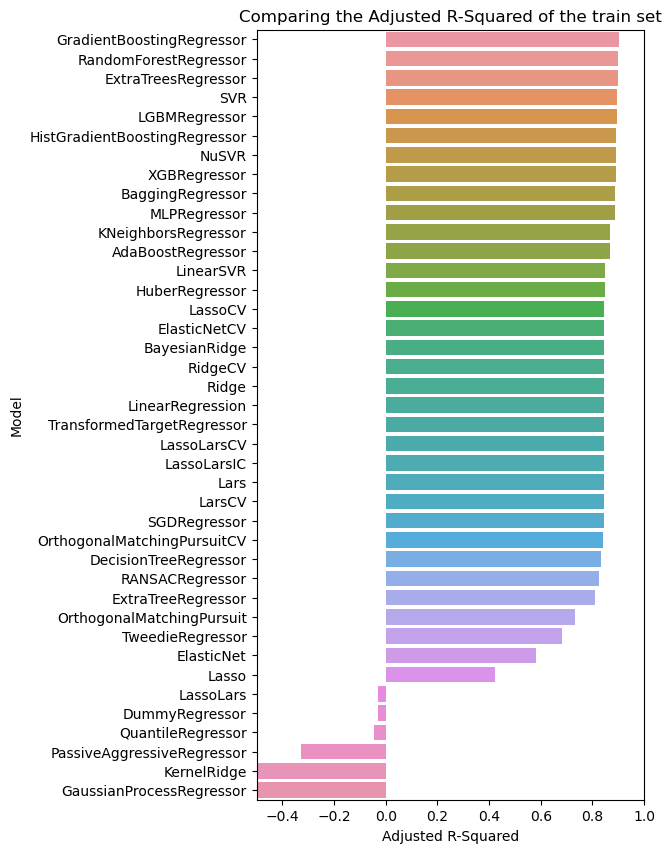

In [143]:
plt.figure(figsize=(5, 10))
ax = sns.barplot(x = "Adjusted R-Squared", y = train.index, data = train);
ax.set_xlim(-0.5, 1)
plt.title("Comparing the Adjusted R-Squared of the train set");

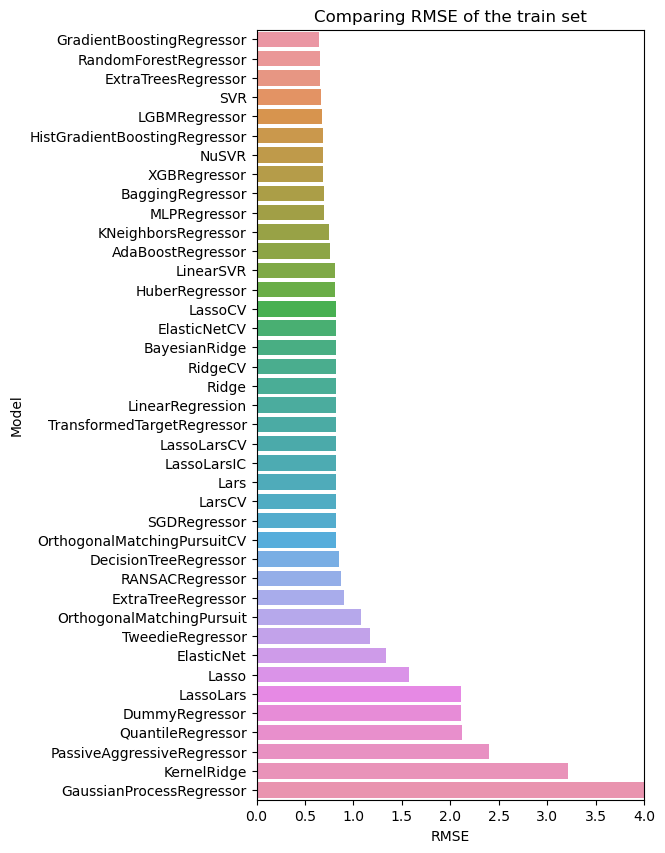

In [144]:
plt.figure(figsize=(5, 10))
ax = sns.barplot(x = "RMSE", y = train.index, data = train);
ax.set_xlim(0, 4)
plt.title('Comparing RMSE of the train set');

And now I will visualize the results for the test set

In [145]:
test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.90,0.91,0.65,0.06
RandomForestRegressor,0.90,0.90,0.65,0.15
ExtraTreesRegressor,0.90,0.90,0.66,0.09
SVR,0.90,0.90,0.67,0.03
LGBMRegressor,0.89,0.90,0.68,0.87
HistGradientBoostingRegressor,0.89,0.89,0.68,4.10
NuSVR,0.89,0.89,0.69,0.03
XGBRegressor,0.89,0.89,0.69,0.36
BaggingRegressor,0.89,0.89,0.70,0.02


(-0.5, 1.0)

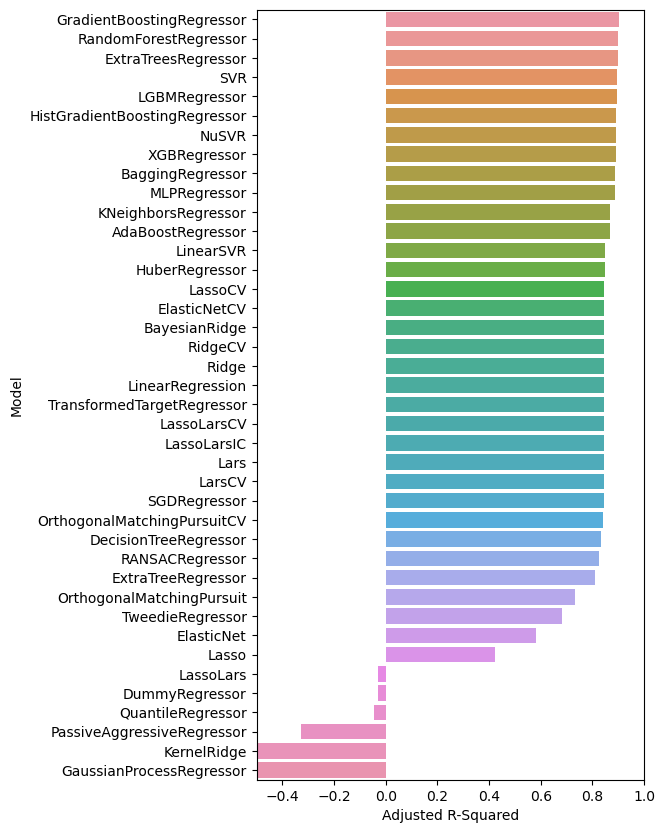

In [146]:
plt.figure(figsize=(5, 10))
ax = sns.barplot(x = "Adjusted R-Squared", y = test.index, data = test);
ax.set_xlim(-0.5, 1)

It seems that Gradient Boosting regressor and Random Forest Regressor are the two of the best models, so I will go with these two.

Optimizing the hyperparameter n_estimator: RandomForestRegressor

In [147]:
my_estimators = list(range(100, 1001, 100))

In [148]:
scores = []
for i in tqdm(my_estimators):
    rf = RandomForestRegressor(n_estimators = i, random_state = 42)
    rf.fit(X_train, y_train)
    score = rf.score(X_test, y_test)
    scores.append(score)

100%|███████████████████████████████████████████| 10/10 [00:07<00:00,  1.31it/s]


In [149]:
my_estimators = pd.Series(my_estimators)

In [150]:
scores = pd.Series(scores)

In [151]:
df2 = pd.concat([my_estimators, scores], axis =1)
df2.columns = ['n_estimators', 'accuracy']
df2.set_index('n_estimators', inplace=True)

In [152]:
df2

,accuracy
n_estimators,
100,0.90
200,0.91
300,0.90
400,0.90
500,0.90
600,0.91
700,0.91
800,0.91
900,0.91


It seems the best accuracy is 91% and by using n_estimators = 200, the accuracy does not dip anymore.

I will make a model with that n_estimator

In [153]:
rf = RandomForestRegressor(random_state = 42, n_estimators = 200)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [154]:
feature_importances = pd.DataFrame(rf.feature_importances_, columns = ['importance'], index = X_test.columns).sort_values(by = 'importance', ascending = False)

In [155]:
feature_importances

,importance
MolLogP,0.82
MolWt,0.10
TPSA,0.04
NumHAcceptors,0.01
NumAromaticRings,0.01
NumHDonors,0.01


It seems that the LogP is the most important feature in determining the solubility.

I will now compare these results to the results obtained by using Gradient Boosting Regressor.

Optimizing the hyperparameter n_estimator: GradientBoostingRegressor

In [157]:
scores1 = []
for i in tqdm(my_estimators):
    gb = GradientBoostingRegressor(n_estimators = i, random_state = 42)
    gb.fit(X_train, y_train)
    score1 = gb.score(X_test, y_test)
    scores1.append(score1)

100%|███████████████████████████████████████████| 10/10 [00:02<00:00,  3.36it/s]


In [158]:
my_estimators = pd.Series(my_estimators)
scores1 = pd.Series(scores1)

In [159]:
df3 = pd.concat([my_estimators, scores1], axis =1)
df3.columns = ['n_estimators', 'accuracy']
df3.set_index('n_estimators', inplace=True)

In [160]:
df3

,accuracy
n_estimators,
100,0.91
200,0.90
300,0.91
400,0.90
500,0.90
600,0.90
700,0.90
800,0.90
900,0.90


In [162]:
gb = GradientBoostingRegressor(random_state = 42, n_estimators = 100)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

In [163]:
feature_importances = pd.DataFrame(gb.feature_importances_, columns = ['importance'], index = X_test.columns).sort_values(by = 'importance', ascending = False)

In [164]:
feature_importances

,importance
MolLogP,0.83
MolWt,0.09
TPSA,0.05
NumAromaticRings,0.01
NumHAcceptors,0.01
NumHDonors,0.00


Overall, the two models I used (RandomForest and Gradient Boosting Regressors) gave similar results, with LogP being the most important feature in determining LogS. 